# Photometry

Photometry in astronomy is generally the study of the brightness of objects. It is an extremely useful tool, and one of the oldest methods in astronomy. It has been essential for understanding things, such as the cosmic distance ladder. We know, for instance, that Cepheid variable stars have a period-luminosity relationship (i.e., the length of its pulsations are related to the its luminosity). By observing their pulsation period and apparent brightness, we can therefore determine how far away they are. Type Ia supernovae also have a well-known luminosity, so observing their brightness gives us their distance. These are two essential pieces of information that we use as "standard candles" to help us find distances in astronomy, which is a shockingly hard problem. Using these tools, we have discovered much about cosmology. They provided the first evidence of an exanding universe (Hubble's Law) and an accelerating expanding universe (dark energy).

The tools used for photometry are numerous, and it has a huge variety of applications. One of the most important ones in recent history is the ability of high-sensitivity photometric observations to identify exoplanets.

# Exoplanet Transits

## Misc code

In [1]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

legends = 12
ticks = 12
colorbars = 12
labels = 16
lw = 3

rsol = 6.957e+8 # m
au_in_m = 1.496e+11
rjup_in_rsol = 0.102763
reath_in_rsol = 0.00916794
rearth_in_rjup = reath_in_rsol / rjup_in_rsol
hours_per_year = 24 * 365.24


### Load

In [2]:
def load_planet_hdu(planet: str, data_dir: str = "../Data/Transit_Curves/"):

    """Loads a light curve file"""
    
    data_name = f"{planet}/{planet}.fits"
    data_path = f"{data_dir}{data_name}"
    return fits.open(data_path)
    

### Plot

In [3]:
def plot_light_curve(planet: str, xlims: list = [None, None], hdu_index: int = 1, vlines: list = []):

    """Plots the light curve averaged over all periods along with the fit model"""
    
    hdu = load_planet_hdu(planet)
    data = hdu[hdu_index].data
    times = data["PHASE"] * (hdu[1].header["TPERIOD"] / 2) * 24.

    plt.figure(figsize=(8., 6))
    plt.scatter(times, 
                data["LC_DETREND"] + 1,
                c="firebrick",
                s=2)
    plt.scatter(times, data["MODEL_INIT"] + 1, 
                c="steelblue",
                s=2, alpha=0.1
               )
    plt.axhline(np.min(data["MODEL_INIT"] + 1), ls="--", c="gray")
    for line_ in vlines:
        plt.axvline(line_, ls="-", c="k")
    plt.xlim(left=xlims[0], right=xlims[1])
    plt.ylim(top=1.002)
    plt.xlabel("Time [hours]", fontsize=labels)
    plt.ylabel("Relative Brightness", fontsize=labels)
    plt.xticks(fontsize=ticks)
    plt.yticks(fontsize=ticks)
    plt.show()

In [4]:
def plot_system():
    # Create figure and axes without borders or ticks
    fig, ax = plt.subplots(figsize=(6., 6.))
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Set plot limits
    ax.set_xlim(-10, 10)
    ax.set_ylim(-4, 4)
    
    # Create the larger circle in the middle
    large_circle = Circle((0, 0), 3, color='gold')
    ax.add_patch(large_circle)
    
    # Create three smaller circles
    small_circles = []
    rp = 0.5
    locs = [-6, -3, 0, 3, 6]
    for i in locs:
        circle = Circle((i, 0), rp, color="k")
        ax.add_patch(circle)
        small_circles.append(circle)

    plt.tight_layout()
    plt.show()


## Overview

This lesson focuses on understanding exoplanet transits and how they can used to determine the properties of the transiting exoplanet. This is an example of an important modern observation that has revolutionized astronomy. 

The basic idea behind exoplanet transits is that exoplanets passing in front of their host stars will cause a slight decrease in the observed brightness of that star. In other words, when an exoplanet passes in front of its star, part of the star is eclipsed by the planet, which means that we observe slightly less light coming from that star. An exoplanet that is orbiting a star will cause a characteristic change in the star's brightness each time it passes in front. This causes a periodic dimming and brightning that we can observe and use to understand the planet. While the idea is simple, the change in brightness can be tiny, so we need very sensitive telescopes to observe this in most cases. This method has been used to discover about *half* of the known exoplanets, with the Kepler telescope being particularly important.

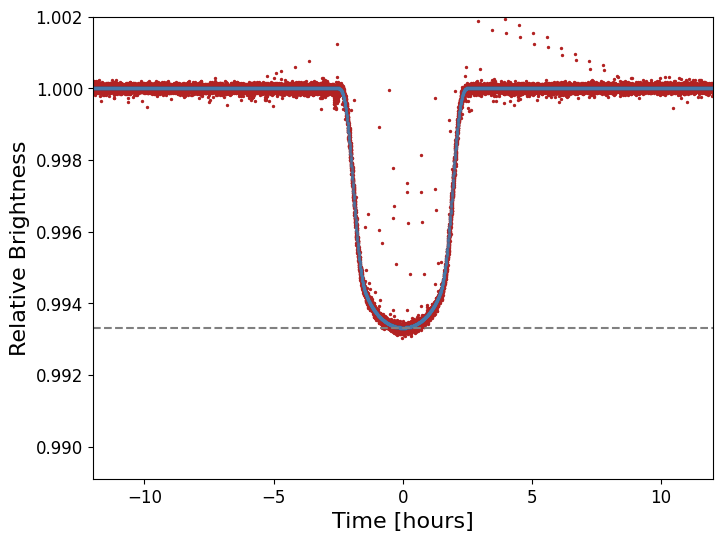

In [5]:
plot_light_curve("Kepler_2b", 
                 xlims=[-12, 12],
                )

Much of this is based on simple geometry. In the most simple approximation, the star has an observed brightness due to a cross sectional area of 

$A_{\star} = \pi R_{\star}^{2}$

The planet has an area of 

$A_\mathrm{planet} = \pi R_\mathrm{planet}^{2}$

When the planet passes in front of the star, we only observe light coming from $A_\star - A_{\mathrm{planet}}$ (this assumes that the distance between the planet and the star is much, much less than the distance to the system, which is true). 

This causes a relative decrease in brightness of

$\left( A_\star - A_{\mathrm{planet}}\right) / A_{\star} = 1 - A_{\mathrm{planet}}/ A_{\star}$

or

$1 - R_\mathrm{planet}^{2}/ R_\star ^{2}$

If we define $D$, the transit depth, to be the fraction of light that we lose when the planet eclipses the star, we can see that the depth of the transit contains information about both the radius of both the star and the planet.

$R_\mathrm{planet} = R_\star \sqrt{D}$

We can usually at least get a half-decent estimate of a star's radius because there's a rough relationship between a star's mass and its radius, and we can use its spectrum to get a decent idea of its mass (there are more precise ways to do this of course). This means that we can very easily get a pretty good estimate of the planet's radius simply by looking at the slight dimming of the star.

As you might imagine, this detection method is very biased. It preferentially detects large planets that are close to their stars. These planets will maximize the area of the star eclipsed, and therefore the transits will be the most pronounced. This is why transits often find planets known as "hot jupiters," which are planets around the size of Jupiter that are close to their host stars.

It also takes the planet a certain amount of time to fully eclipse the star. This causes the brightness to gradually decrease then settle into a constant depth until it starts to exit again. The time it takes for the eclipse to fully take place is related to the geometry of the system, the planet's radius, and the planet's semimajor axis. It is more complicated than we'll get into today.

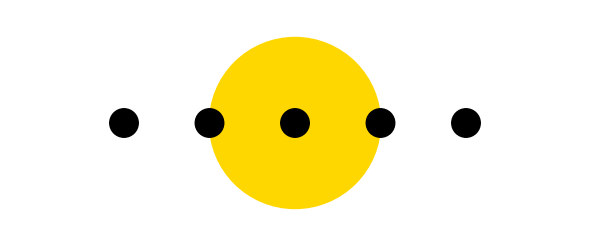

In [6]:
plot_system()

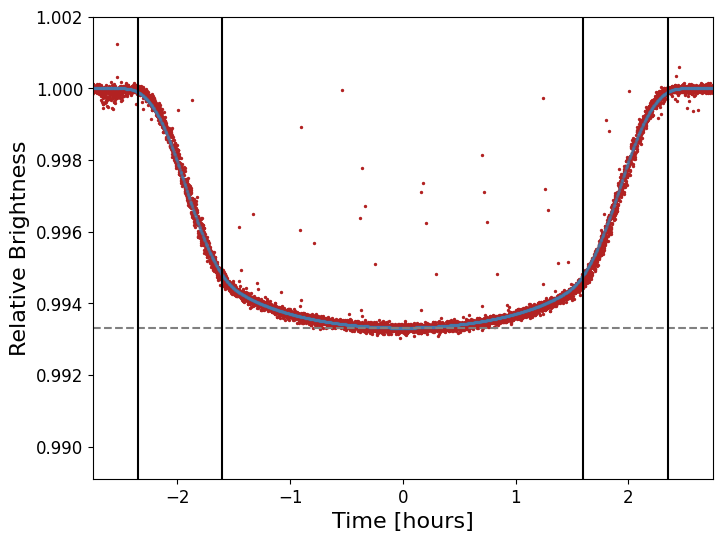

In [7]:
tt = 2.35
tf = 1.6
vlines = [-tt, -tf, tf, tt]
plot_light_curve("Kepler_2b", 
                 xlims=[-2.75, 2.75],
                 vlines=vlines,
                )

Another great thing about transits is that they can be used to fairly simply constrain the planet's distance from the star. This relies on Kepler's 3rd law, which states that

$M_\star P^{2} = a^{3}$

where $M_{\star}$ is the host star's mass in solar masses, $P$ is the planet's orbital period in years, and $a$ is the planet's semimajor axis in au. Because one will always observe multiple transits in order to be sure that what is being seen is truly a planet, the planet's orbital period, i.e., its year length, is well-known. Using this an estimate for the host star's mass, we can easily get the planet's semimajor axis.

This means that transits very easily give us the planet's radius and semimajor axis. Generally, a planet's semimajor axis and mass are considered to be the two most important parameters that describe it. While transits can't give a direct estimate of a planet's mass, we can get a somewhat rough idea using heuristics since we know the radius. Combining transits with other techniques can be a powerful way to understand exoplanets and their population. We will use [some Kepler](https://drive.google.com/drive/folders/1VMoGlaHsD7TPB53PhinPMUrD3MTpKLZr?usp=drive_link) light curves for this class.

# Get data

In [8]:
data_dir = "../Data/Transit_Curves/"

In [9]:
planets = ["Kepler_1b", "Kepler_2b", "Kepler_10c", "Kepler_100b", "Kepler_1011b"]

In [10]:
# https://exo.mast.stsci.edu/exomast_planet.html?planet=Kepler1b
# https://exo.mast.stsci.edu/exomast_planet.html?planet=Kepler2b
# https://exo.mast.stsci.edu/exomast_planet.html?planet=Kepler10c
# https://exo.mast.stsci.edu/exomast_planet.html?planet=Kepler100b
# https://exo.mast.stsci.edu/exomast_planet.html?planet=Kepler1011b

star_masses = {} # Msun
star_masses["Kepler_1b"] = 1.36
star_masses["Kepler_2b"] = 1.56
star_masses["Kepler_10c"] = 0.91
star_masses["Kepler_100b"] = 1.08
star_masses["Kepler_1011b"] = 0.91

planet_masses = {} # Mjup
planet_masses["Kepler_1b"] = 1.49
planet_masses["Kepler_2b"] = 1.84
planet_masses["Kepler_10c"] = 0.0359
planet_masses["Kepler_100b"] = 0.023
planet_masses["Kepler_1011b"] = 0.0271

### The header contains information about the system observed
star_radii = {} # Rsun
star_T = {} # K
planet_radii = {} # Rjup
planet_masses = {} # Mjup
planet_period = {} # Days
transit_times = {} # hr
for planet in planets:
    data_name = f"{planet}/{planet}.fits"
    data_path = f"{data_dir}{data_name}"
    with fits.open(data_path) as hdu:
        star_radii[planet] = hdu[0].header["RADIUS"]
        star_T[planet] = hdu[0].header["TEFF"]
        planet_radii[planet] = hdu[1].header["PRADIUS"] * rearth_in_rjup
        planet_period[planet] = hdu[1].header["TPERIOD"]
        transit_times[planet] = hdu[1].header["TDUR"]

# Look at data

In [11]:
planet = "Kepler_1b"
hdu = load_planet_hdu(planet)

In [12]:
hdu.info()

Filename: ../Data/Transit_Curves/Kepler_1b/Kepler_1b.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  TCE_1         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  Statistics    1 BinTableHDU    221   71427R x 50C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [13]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    3 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2016-03-01'         / file creation date.                            
CREATOR = '1165165 DvTimeSeriesExporter2PipelineModule' / pipeline job and progr
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.43 r61051' / SW version   
FILEVER = '2.0     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [14]:
hdu[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   44 / length of first array dimension                
NAXIS2  =                71427 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

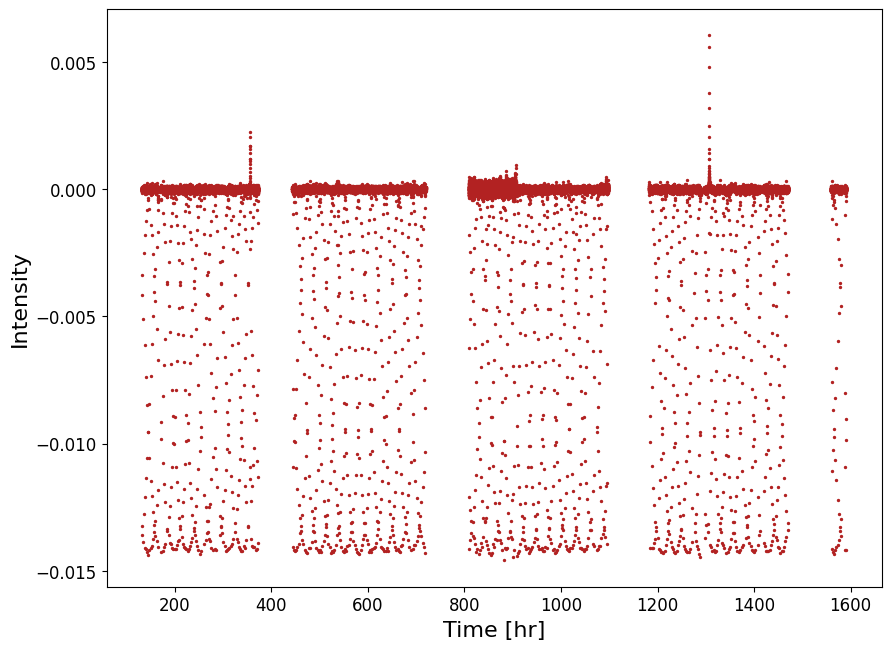

In [15]:
### Let's just look at the raw data
plt.figure(figsize=(10., 7.5))

plt.scatter(hdu[1].data["TIME"], hdu[1].data["LC_INIT"], s=2, c="firebrick")
plt.xlabel("Time [hr]", fontsize=labels)
plt.ylabel("Intensity", fontsize=labels)

plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)
plt.show()

Kepler_1b


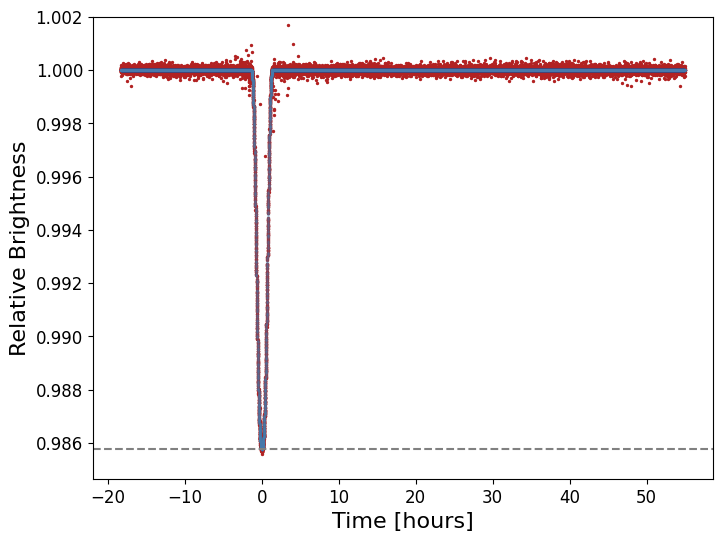

Kepler_2b


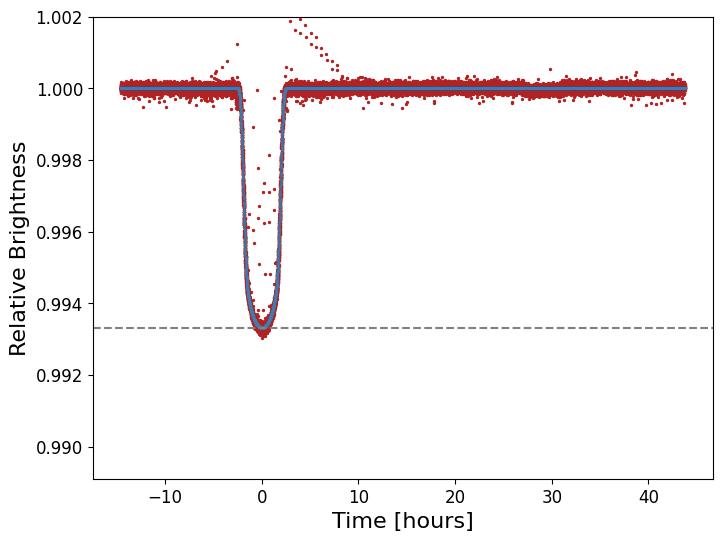

Kepler_10c


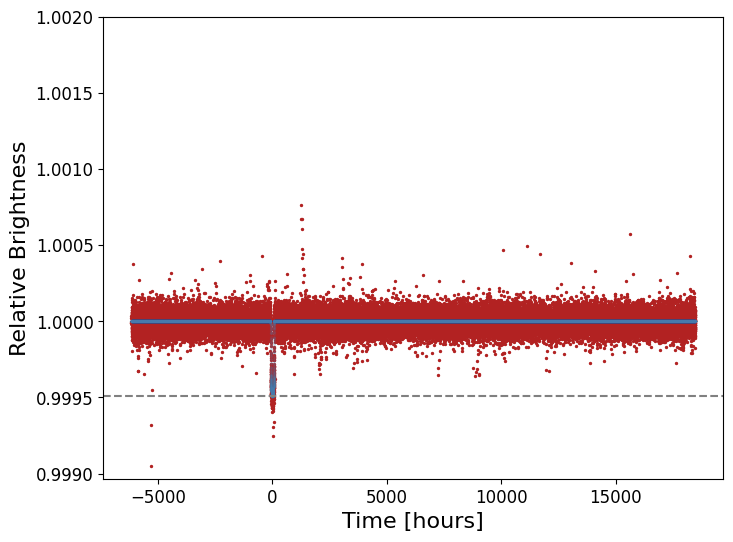

Kepler_100b


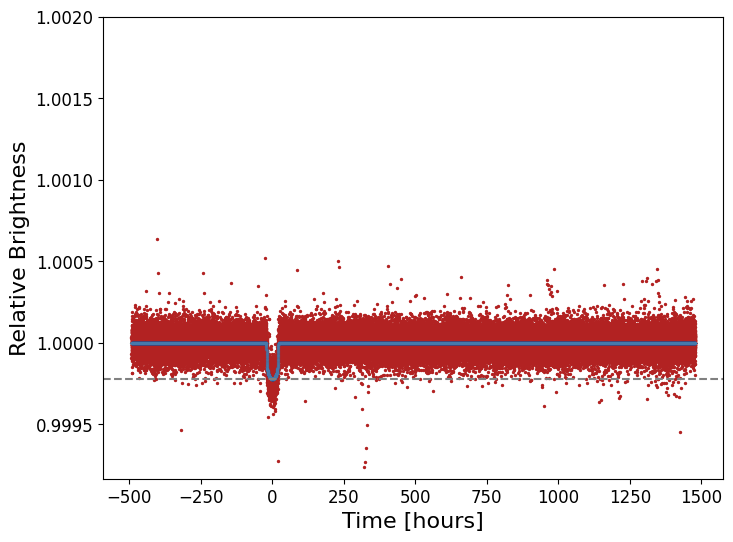

Kepler_1011b


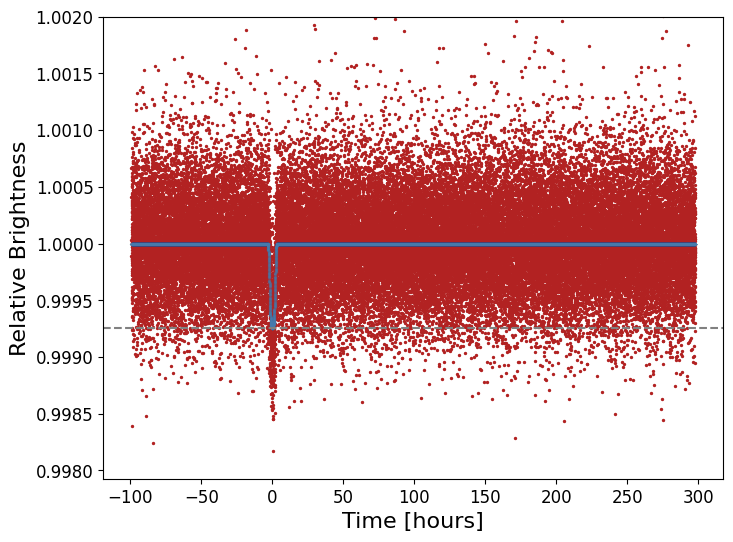

In [16]:
#### They've been nice and done corrections and averaging over all transits
#### This is much better for visualization and analysis
for planet in planets:
    print(planet)
    plot_light_curve(planet, hdu_index=1)

# Transit Depth

In [17]:
def get_planet_radius_from_depth(planet: str):
    """Uses Rp = Rstar sqrt(depth) to get the planetary radius"""
    hdu = load_planet_hdu(planet)
    depth = get_transit_depth(planet)
    rstar = hdu[0].header["RADIUS"]
    return rstar * np.sqrt(depth)

def get_transit_depth(planet: str, hdu_index: int = 1):
    """Gets the transit depth as the minimum magnitude observed"""
    hdu = load_planet_hdu(planet)
    data = hdu[hdu_index].data
    
    return 1. - np.min(data["MODEL_INIT"] + 1)

In [18]:
for planet in planets:
    rplanet = get_planet_radius_from_depth(planet) / rjup_in_rsol
    print(f"Calculated R = {planet} = {rplanet:.4f} Rjup")
    print(f"Quoted R = {planet} = {planet_radii[planet]:.4f} Rjup\n")

Calculated R = Kepler_1b = 1.1024 Rjup
Quoted R = Kepler_1b = 1.1815 Rjup

Calculated R = Kepler_2b = 1.5831 Rjup
Quoted R = Kepler_2b = 1.4972 Rjup

Calculated R = Kepler_10c = 0.2273 Rjup
Quoted R = Kepler_10c = 0.2228 Rjup

Calculated R = Kepler_100b = 0.2156 Rjup
Quoted R = Kepler_100b = 0.2174 Rjup

Calculated R = Kepler_1011b = 0.2463 Rjup
Quoted R = Kepler_1011b = 0.2845 Rjup



# Detailed transit shape

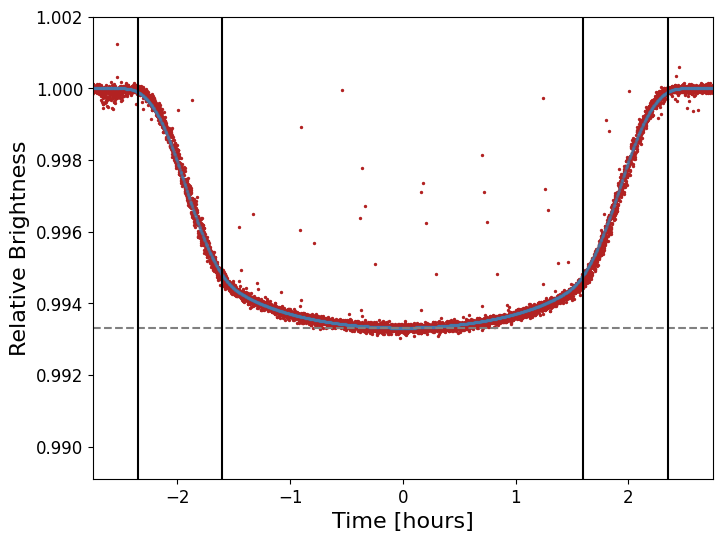

In [19]:
tt = 2.35
tf = 1.6
vlines = [-tt, -tf, tf, tt]
plot_light_curve("Kepler_2b", 
                 xlims=[-2.75, 2.75],
                 vlines=vlines,
                )

# Planet's semimajor axis

In [20]:
def get_sma_from_ratio(planet: str):
    """Header gives information on planet sma to stellar radius ratio"""
    hdu = load_planet_hdu(planet)
    return hdu[1].header["DRRATIO"] * star_radii[planet] * rsol / au_in_m

def get_sma_from_period(planet: str):
    """Use Kepler's third law to get semimajor axis from transit period"""
    return (star_masses[planet] * (planet_period[planet] / 365.24) ** (2.)) ** (1./3.)

In [21]:
for planet in planets:
    print(f"SMA for {planet} using ratio: {get_sma_from_ratio(planet):.4f} au")
    print(f"SMA for {planet} using period: {get_sma_from_period(planet):4f} au\n")

SMA for Kepler_1b using ratio: 0.0349 au
SMA for Kepler_1b using period: 0.039628 au

SMA for Kepler_2b using ratio: 0.0348 au
SMA for Kepler_2b using period: 0.038450 au

SMA for Kepler_10c using ratio: 0.1710 au
SMA for Kepler_10c using period: 0.240985 au

SMA for Kepler_100b using ratio: 0.0650 au
SMA for Kepler_100b using period: 0.109965 au

SMA for Kepler_1011b using ratio: 0.0475 au
SMA for Kepler_1011b using period: 0.060893 au

